In [1]:
import pandas as pd
import numpy as np
import sklearn
import xgboost

# Exploring the data

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [4]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
data['Pclass'].unique()

array([3, 1, 2])

In [6]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [7]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [8]:
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [9]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [12]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [13]:
data['Cabin_letter'] = data['Cabin'].str[0]
data.head(1)

PassengerId  Survived  Pclass                     Name   Sex   Age  SibSp  \
0            1         0       3  Braund, Mr. Owen Harris  male  22.0      1   

   Parch     Ticket  Fare Cabin Embarked Cabin_letter  
0      0  A/5 21171  7.25   NaN        S          NaN

In [14]:
data['Cabin_letter'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

# Mapping data to numerical values

In [15]:
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [16]:
mapper = DataFrameMapper([
    (['Pclass'], [SimpleImputer(missing_values=np.nan, strategy='mean'),StandardScaler()]),
    (['SibSp'], [SimpleImputer(missing_values=np.nan, strategy='mean'),StandardScaler()]),
    (['Parch'], [SimpleImputer(missing_values=np.nan, strategy='mean'),StandardScaler()]),
    (['Fare'], [SimpleImputer(missing_values=np.nan, strategy='mean'),StandardScaler()]),
    (['Age'], [SimpleImputer(missing_values=np.nan, strategy='mean'),StandardScaler()]),
    (['Cabin_letter'], [SimpleImputer(strategy='most_frequent'),LabelBinarizer(),StandardScaler()]),
    (['Sex'], [SimpleImputer(strategy='most_frequent'),LabelBinarizer(),StandardScaler()]),
    (['Embarked'], [SimpleImputer(strategy='most_frequent'),LabelBinarizer(),StandardScaler()]),
])

In [17]:
data_mapped = mapper.fit_transform(data)

In [18]:
X = data_mapped
y = data['Survived']
X.shape

(891, 17)

# Checking the performace of some basic models as a baseline using cross-validation

In [19]:
from sklearn.model_selection import cross_val_score
def evaluate(clf,xx,yy):
    scores = cross_val_score(clf, xx, yy, cv=5)
    return scores.mean(), scores.var()

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logreg = LogisticRegression(random_state=0)

In [22]:
evaluate(logreg,X,y)

(0.7890088506685079, 0.00014283499859164833)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier()
evaluate(dectree, X, y)

(0.7778168351013747, 0.0006688767001246314)

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
evaluate(rf, X, y)

(0.8126106333563492, 0.001251674208718526)

In [25]:
rf_100 = RandomForestClassifier(n_estimators=100,random_state=0)
evaluate(rf_100, X, y)

(0.808122528403741, 0.0013617402311923122)

In [26]:
from sklearn.svm import SVC
sv = SVC()
evaluate(sv, X, y)

(0.8058439520431863, 0.0002567177758426954)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
evaluate(knn, X, y)

(0.8002510827945516, 0.0005761486451751828)

In [28]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='error')
evaluate(xgb,X,y)

(0.8193333751804659, 0.0005987237953757803)

# Finetune the hyperparameters of the Gradient Boosting Machine model

In [29]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [30]:
etas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3]
acc = []
for eta in etas:
    xgb = XGBClassifier(random_state=0,learning_rate=eta, use_label_encoder=False, eval_metric='error')
    acc.append(evaluate(xgb,X,y)[0])
acc = np.array(acc)
plt.plot(etas,acc)
plt.show
best_eta=etas[np.argmax(acc)]
print(best_eta)

0.05


In [31]:
etas = np.linspace(0.02,0.07,61)
acc = []
for eta in etas:
    xgb = XGBClassifier(random_state=0,learning_rate=eta, use_label_encoder=False, eval_metric='error')
    acc.append(evaluate(xgb,X,y)[0])
acc = np.array(acc)
plt.plot(etas,acc)
plt.show
best_eta=etas[np.argmax(acc)]
print(best_eta)

0.05


95


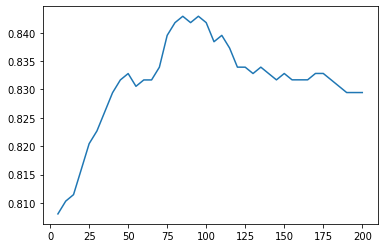

In [32]:
num_trees = np.array([5*i for i in range(1,41)])
acc = []
for nt in num_trees:
    xgb = XGBClassifier(random_state=0,learning_rate=best_eta,n_estimators=nt, use_label_encoder=False, eval_metric='error')
    acc.append(evaluate(xgb,X,y)[0])
acc = np.array(acc)
plt.plot(num_trees,acc)
plt.show
best_nt=num_trees[np.argmax(acc)]
print(best_nt)

In [33]:
depth_values = np.array(range(1,11))
acc = []
for p in depth_values:
    xgb = XGBClassifier(random_state=0,learning_rate=best_eta,n_estimators=best_nt,max_depth=p, use_label_encoder=False, eval_metric='error')
    acc.append(evaluate(xgb,X,y)[0])
acc = np.array(acc)
plt.plot(depth_values,acc)
plt.show
best_depth = depth_values[np.argmax(acc)]
print(best_depth, np.max(acc))

6 0.8429037725189883


In [34]:
final_model = XGBClassifier(learning_rate=best_eta, n_estimators=best_nt, max_depth=best_depth, use_label_encoder=False, eval_metric='error')
final_model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=95, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

# Apply model on the test dataset

In [35]:
test_dataset = pd.read_csv('data/test.csv')

In [36]:
test_dataset.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [37]:
test_dataset['Cabin_letter'] = test_dataset['Cabin'].str[0]

In [38]:
indexes = test_dataset['PassengerId']

In [39]:
X_test_final = mapper.transform(test_dataset)

In [40]:
y_predict_final = final_model.predict(X_test_final)

In [41]:
result = pd.DataFrame()
result['PassengerId'] = indexes
result['Survived'] = y_predict_final

In [42]:
result.to_csv('data/submission.csv',index=False)